### Generate Images

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm

# Create directories
os.makedirs('target_galaxy', exist_ok=True)
os.makedirs('input_galaxy', exist_ok=True)
os.makedirs('org_galaxy', exist_ok=True)


gray_values = np.array(Image.open(f'bird')) / 255.0

# print(gray_values)
#Function for generating Fourier transoformed images

def fourier_images(image_input):

    # Compute FFT
    ft = np.fft.fftshift(np.fft.fft2(np.fft.fftshift(image_input-np.mean(image_input))))
    #ft = np.fft.fft2(image_input-np.mean(image_input))
    
    ft = ft/np.max(abs(ft))
    # Real and imaginary part
    real_part = np.real(ft)
    imag_part = np.imag(ft)
    print(np.max(real_part), np.mean(real_part))
    print("-----")
    print(print(np.max(imag_part), np.mean(imag_part)))
    print("*****")
    
    # Process magnitude
    mag_ft = np.abs(real_part+1j*imag_part)
    #mag_img = (mag_ft*255).astype(np.uint8)
    mag_img = mag_ft


    # Process phase (convert from [-π,π] to [0,255])
    arg_ft = np.arctan2(imag_part, real_part)
    #arg_img = ((arg_ft + np.pi) / (2 * np.pi) * 255).astype(np.uint8)
    arg_img = arg_ft

    return mag_img, arg_img, real_part, imag_part, ft

# Generate Fourier Transformed Images







# Process masked data (lower half)

# masked_mag = np.log(np.abs(real_part + 1j*imag_part) + 1e-10)
# masked_img = ((masked_mag - masked_mag.min()) / (masked_mag.max() - masked_mag.min()) * 255).astype(np.uint8)
# test = masked_img
# masked_img = (masked_img * mask).astype(np.uint8)

# Save processed images
# Image.fromarray(mag_img).save(f'target_images/mag_img_{i+1:03d}.png')
# Image.fromarray(arg_img).save(f'target_images/arg_img_{i+1:03d}.png')
# Image.fromarray(masked_img).save(f'input_images/mask_img_{i+1:03d}.png')

print("Image generation complete!")

Image generation complete!


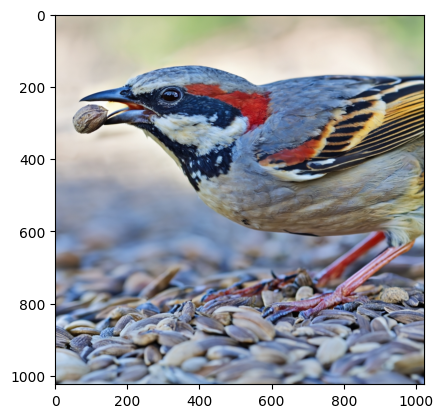

In [117]:
plt.imshow(gray_values)
plt.show()

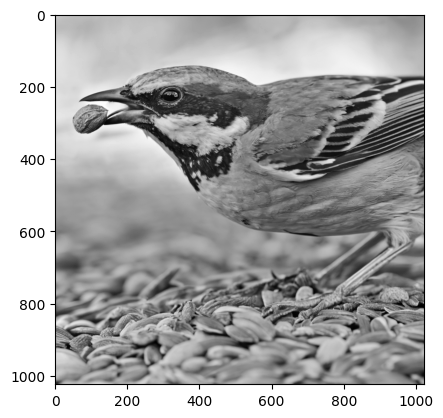

In [118]:


gray_values_new = np.mean(gray_values, 2)
plt.imshow(gray_values_new, cmap = "gray")
plt.show()

In [119]:
gray_values_new.shape

(1024, 1024)

In [120]:
print(gray_values_new)

[[0.79346405 0.78562092 0.79738562 ... 0.54248366 0.55555556 0.54640523]
 [0.79607843 0.78823529 0.79738562 ... 0.54640523 0.55686275 0.55163399]
 [0.79346405 0.78562092 0.79084967 ... 0.5503268  0.56078431 0.55424837]
 ...
 [0.11764706 0.12679739 0.11503268 ... 0.64313725 0.63921569 0.62745098]
 [0.1503268  0.13856209 0.12287582 ... 0.6130719  0.60784314 0.60392157]
 [0.23267974 0.18954248 0.16339869 ... 0.5869281  0.5751634  0.58431373]]


In [121]:
mag_img = fourier_images(gray_values_new)[0]
arg_img = fourier_images(gray_values_new)[1]
real_part = fourier_images(gray_values_new)[2]
imag_part = fourier_images(gray_values_new)[3]


ftrans = fourier_images(gray_values_new)[4]

0.6303281968697703 -2.4799075189644602e-06
-----
0.7020105280133593 -2.1568734472320197e-21
None
*****
0.6303281968697703 -2.4799075189644602e-06
-----
0.7020105280133593 -2.1568734472320197e-21
None
*****
0.6303281968697703 -2.4799075189644602e-06
-----
0.7020105280133593 -2.1568734472320197e-21
None
*****
0.6303281968697703 -2.4799075189644602e-06
-----
0.7020105280133593 -2.1568734472320197e-21
None
*****
0.6303281968697703 -2.4799075189644602e-06
-----
0.7020105280133593 -2.1568734472320197e-21
None
*****


In [122]:
np.argmax(ftrans, keepdims = True)

array([[522752]])

In [123]:
print(np.max(real_part))

0.6303281968697703


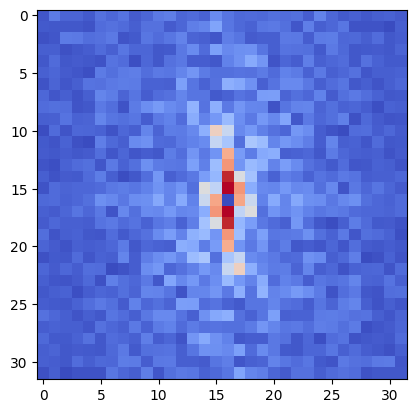

In [124]:
sub = mag_img[496:528,496:528]
plt.imshow(np.tanh(sub), cmap="coolwarm")
plt.show()

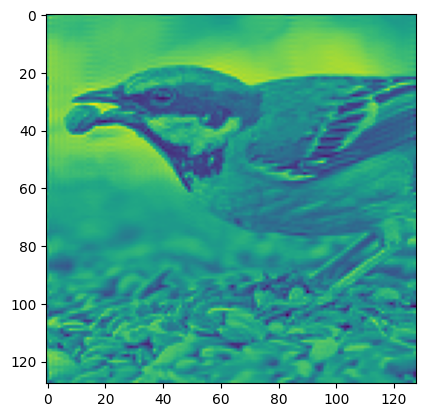

In [127]:
lo = 512-64
hi = 512+64
subft = ftrans[lo:hi,lo:hi] 
subimg = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(subft)))
plt.imshow(subimg.real)
plt.show()